In [1]:
import openai
from openai.types import Completion, CompletionChoice, CompletionUsage
import os
import requests
from dotenv import load_dotenv
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from functools import partial 

load_dotenv("/Users/gabriellelittlefair/Documents/GitHub/MSc Project/DSL/hidden.env")
%reload_ext autoreload
from Setup_Functions import *
from Class_Structures import *
from Region import * 
from Individual import * 
from Pairwise import * 

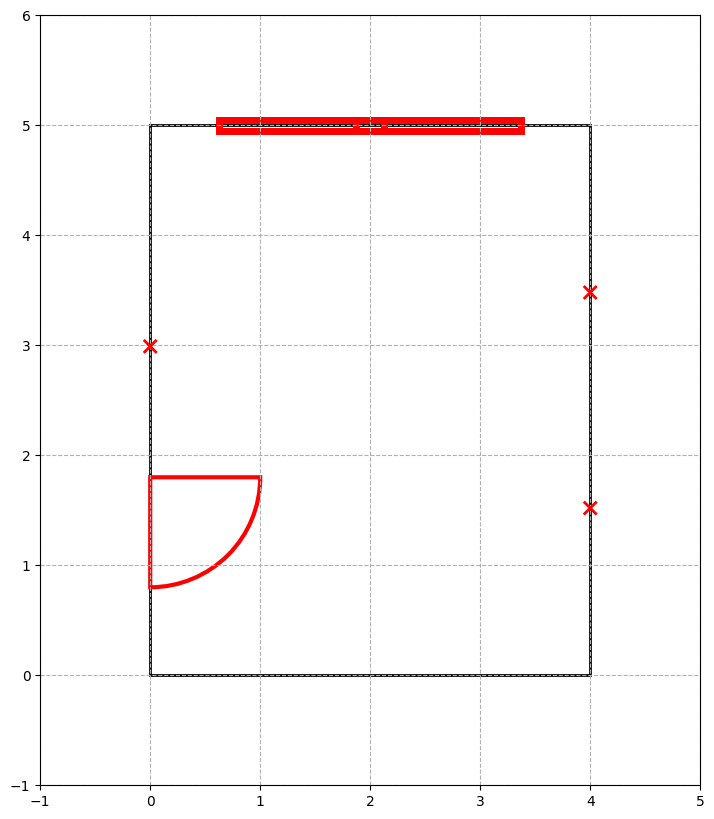

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 18.463210630643946 Optimization terminated successfully
1 16.37929273869581 Optimization terminated successfully
2 15.684662465765093 Optimization terminated successfully
3 0.2548309818257684 Optimization terminated successfully
4 4.076566329265604 Optimization terminated successfully
5 13.497532002989077 Optimization terminated successfully
6 23.618748402824608 Optimization terminated successfully
7 2.7976677464672814 Optimization terminated successfully
8 10.398247346693914 Optimization terminated successfully
9 9.07941279613905 Optimization terminated successfully
10 10.275310987510249 Optimization terminated successfully
11 0.6217462627604948 Optimization terminated successfully
12 11.569002471441518 Optimization terminated successfully
13 15.027822569494584 Optimization terminated successfully
14 9.275157

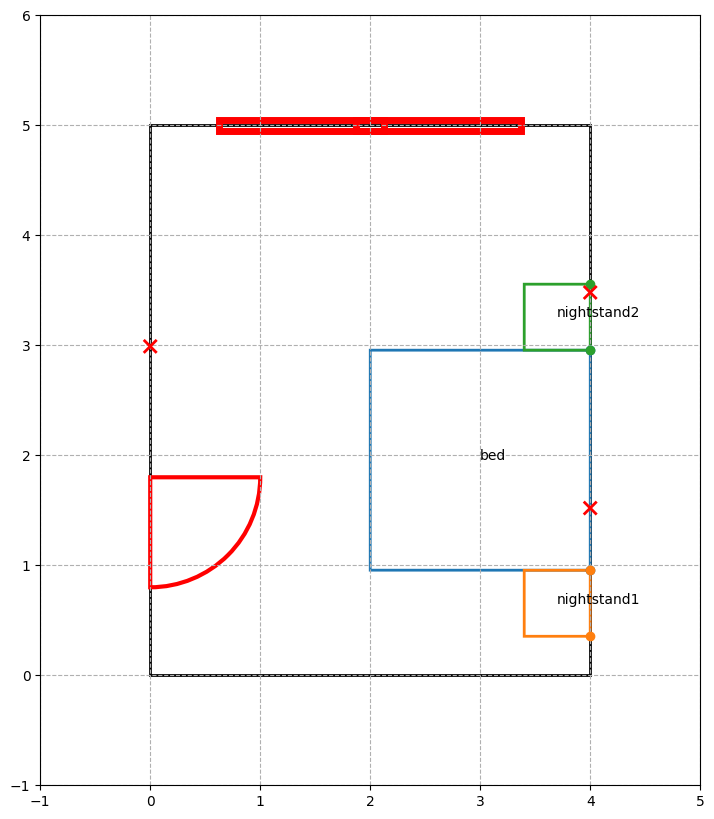

In [5]:
large_bedroom = create_room(4, 5)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)
large_bedroom.draw()

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'nightstand1', 0.6, 0.6, 'dressing', 1)
create_moving_object(large_bedroom, 'nightstand2', 0.6, 0.6, 'dressing', 2)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_next_to_wall(positions, room, 1, side = 'back')
    output += ind_next_to_wall(positions, room, 2, side = 'back')
    output += p_between(positions, room, 0, 1, 2)
    output += p_aligned(positions, room, 0, 1)
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += p_aligned(positions, room, 1, 2, ['bed', 0])
    output += ind_central(positions, room, 0)

    output += 0.2*ind_accessible(positions, room, 0, ['left', 'front'])  # bed
    output += 0.2*ind_accessible(positions, room, 1, ['front'])  # nightstand1
    output += 0.2*ind_accessible(positions, room, 2, ['front'])  # nightstand2

    output += ind_aligned(positions, room)
    output += ind_no_overlap(positions, room)
    output += ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

repeats = 15
positions = np.zeros((repeats, 3*len(large_bedroom.moving_objects)))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects)): 
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf
for j in range(repeats):
    res = minimize(optimize_primary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 
large_bedroom.draw() 

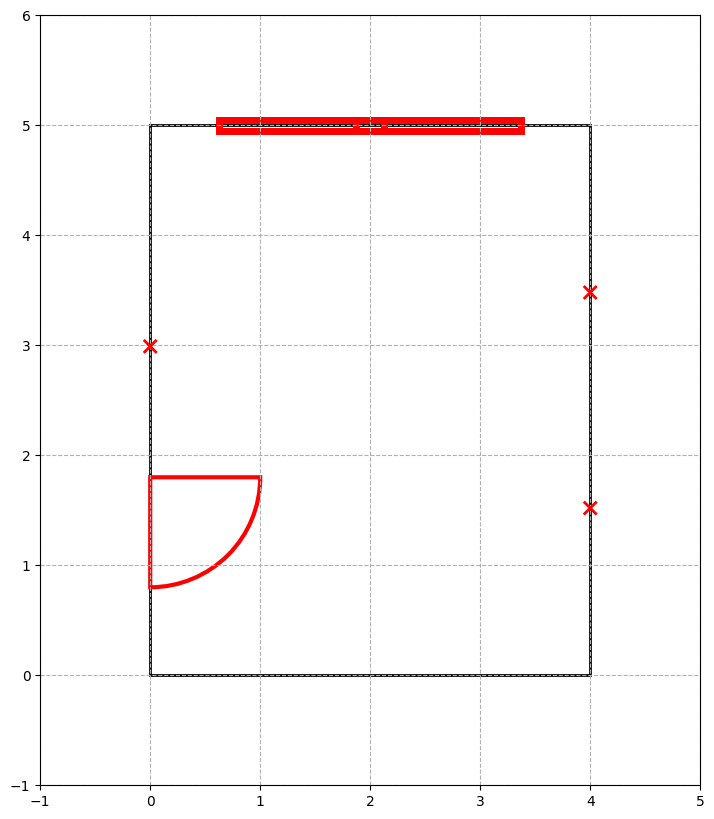

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 109.20995551074489 Optimization terminated successfully
1 2.212806279097683 Optimization terminated successfully
2 5.651412873829251 Optimization terminated successfully
3 36.9227509766201 Optimization terminated successfully
4 15.515230628351468 Optimization terminated successfully
5 10.456262766599496 Optimization terminated successfully
6 8.422908293730638 Optimization terminated successfully
7 0.5684366635390787 Optimization terminated successfully
8 5.918713964697484 Optimization terminated successfully
9 5.625200324267442 Optimization terminated successfully
10 6.330324158269515 Optimization terminated successfully
11 15.351711700502412 Optimization terminated successfully
12 8.285385895638228 Optimization terminated successfully
13 16.850684294764456 Optimization terminated successfully
14 7.84607564022

IndexError: index 15 is out of bounds for axis 0 with size 15

In [21]:
large_bedroom = create_room(4, 5)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)
large_bedroom.draw()

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'nightstand1', 0.6, 0.6, 'dressing', 1)
create_moving_object(large_bedroom, 'nightstand2', 0.6, 0.6, 'dressing', 2)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_next_to_wall(positions, room, 1, side = 'back')
    output += ind_next_to_wall(positions, room, 2, side = 'back')
    output += p_between(positions, room, 0, 1, 2)
    output += p_aligned(positions, room, 0, 1)
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += p_aligned(positions, room, 1, 2, ['bed', 0])
    output += ind_central(positions, room, 0)

    output += 0.2*ind_accessible(positions, room, 0, ['left', 'front'])  # bed
    output += 0.2*ind_accessible(positions, room, 1, ['front'])  # nightstand1
    output += 0.2*ind_accessible(positions, room, 2, ['front'])  # nightstand2

    output += ind_aligned(positions, room)
    output += ind_no_overlap(positions, room)
    output += ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

repeats = 15
positions = np.zeros((repeats, 3*len(large_bedroom.moving_objects)))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects)): 
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf 
j = 0
while min_fun > 0.5:
    res = minimize(optimize_primary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    j += 1
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 
large_bedroom.draw() 


create_moving_object(large_bedroom, 'wardrobe', 1.5, 0.6, 'storage/dressing', 3)
create_moving_object(large_bedroom, 'mirror', 0.6, 0.04, 'storage/dressing', 4)

def optimize_secondary_objects(positions, room): 
    
    output = 0
    output += FIX(positions, room, [0, 1, 2], weight = 20)

    output += ind_not_block_fixed_object(positions, room, 3, 'window')
    output += ind_next_to_wall(positions, room, 3, 'back')
    output += ind_accessible(positions, room, 3, ['front'])
    output += ind_accessible(positions, room, 4, ['front'])
    output += ind_next_to_wall(positions, room, 4, 'back') 
    output += ind_not_block_fixed_object(positions, room, 4, 'window')
    output += p_next_to(positions, room, 3, 4)

    output += 0.2*ind_accessible(positions, room, 0, ['left', 'front'])  # bed
    output += 0.2*ind_accessible(positions, room, 1, ['front'])  # nightstand1
    output += 0.2*ind_accessible(positions, room, 2, ['front'])  # nightstand2

    output += ind_aligned(positions, room)
    output += ind_no_overlap(positions, room)
    output += ind_in_bounds(positions, room)

    return output

options = {'maxiter': 500, 'ftol': 1e-6}
repeats = 15
positions = np.zeros((repeats, 3*len(large_bedroom.moving_objects)))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects) - 1): 
        positions[j, 3*i] = large_bedroom.moving_objects[i].position[0]
        positions[j, 3*i + 1] = large_bedroom.moving_objects[i].position[1]
        positions[j, 3*i + 2] = large_bedroom.moving_objects[i].position[2]
    for i in range(len(large_bedroom.moving_objects) - 1, len(large_bedroom.moving_objects)):
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf
for j in range(repeats):
    res = minimize(optimize_secondary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 
large_bedroom.draw() 

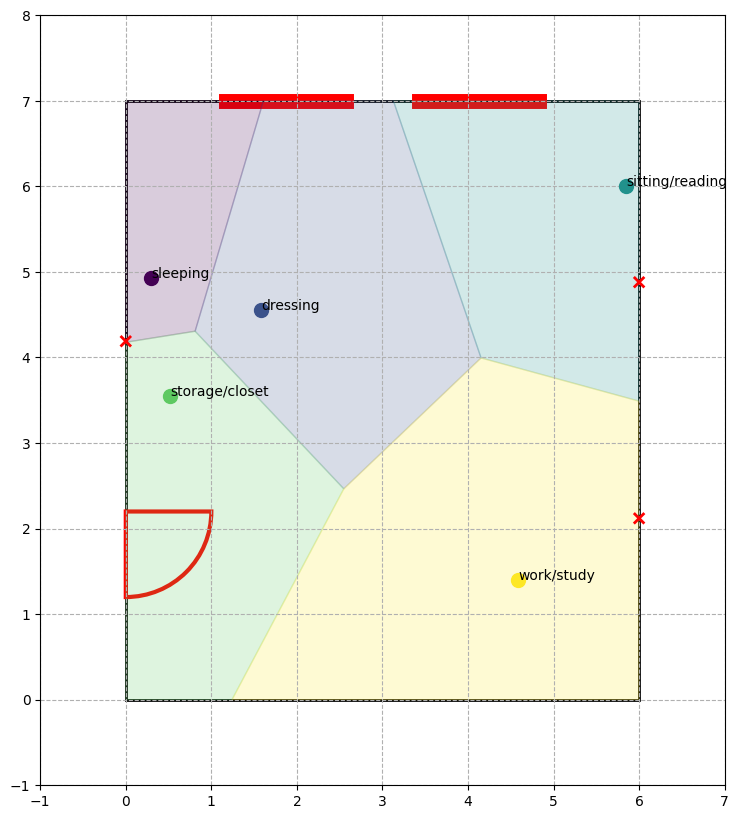

0 20.03395005995804 Optimization terminated successfully 20.03395005995804
1 34.996600279019674 Optimization terminated successfully 34.996600279019674
2 19.188082987314687 Optimization terminated successfully 19.188082987314687
3 42.894378774691454 Optimization terminated successfully 42.894378774691454
4 20.57817907623332 Optimization terminated successfully 20.57817907623332
5 42.691392849473594 Optimization terminated successfully 42.691392849473594
6 18.769715680587726 Optimization terminated successfully 18.769715680587726
7 31.42366634750395 Optimization terminated successfully 31.42366634750395
8 12.333895802599075 Optimization terminated successfully 12.333895802599075
9 20.06487189079408 Optimization terminated successfully 20.06487189079408
10 25.591582276536002 Optimization terminated successfully 25.591582276536002
11 34.713304969875495 Optimization terminated successfully 34.713304969875495
12 15.106710957770014 Optimization terminated successfully 15.106710957770014
13 4

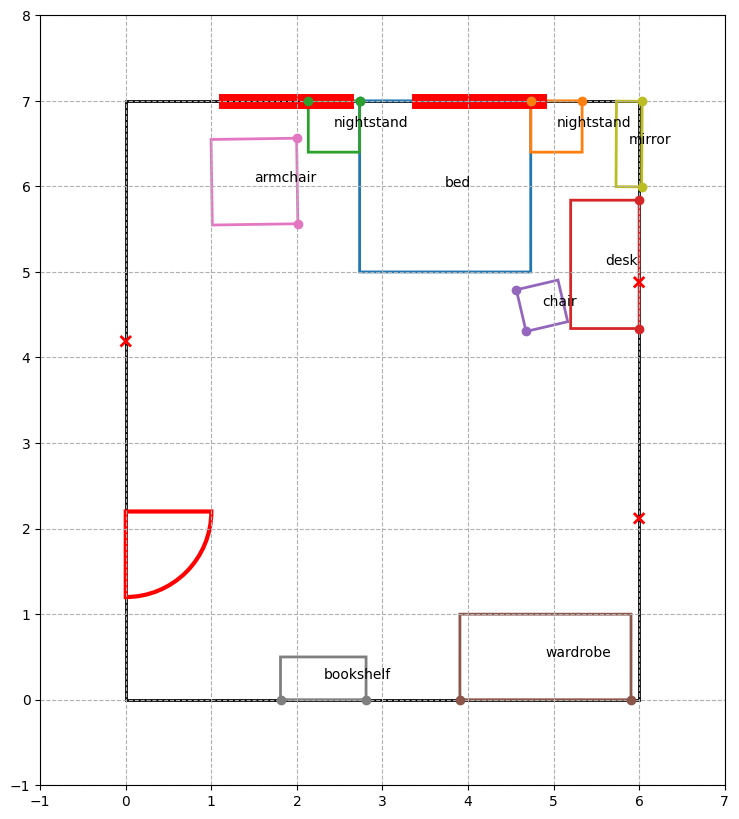

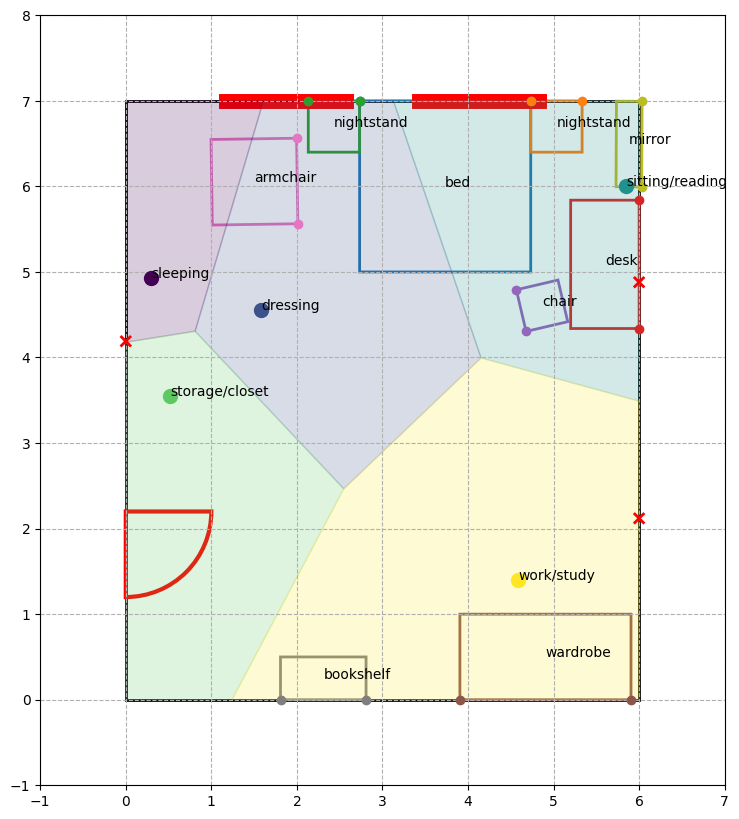

In [11]:
#from Pairwise import * 

large_bedroom = create_room(6, 7)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)

sleeping_region = region_setup(large_bedroom, 'sleeping', 0)
dressing_region = region_setup(large_bedroom, 'dressing', 1)
sitting_reading_region = region_setup(large_bedroom, 'sitting/reading', 2)
storage_closet_region = region_setup(large_bedroom, 'storage/closet', 3)
work_study_region = region_setup(large_bedroom, 'work/study', 4)

positions = np.zeros(2*len(large_bedroom.regions)) 
for i in range(len(large_bedroom.regions)): 
    positions[2*(large_bedroom.regions[i].index)] = large_bedroom.regions[i].x
    positions[2*(large_bedroom.regions[i].index) + 1] = large_bedroom.regions[i].y

def optimize_regions(positions, room): 
    output = 0
    output += reg_close_to_fixed_object(positions, room, 'sleeping', 'socket')
    output += reg_away_from_fixed_object(positions, room, 'sleeping', 'window')
    output += reg_close_to_fixed_object(positions, room, 'sleeping', 'door')
    output += reg_close_to_fixed_object(positions, room, 'dressing', 'window')
    output += reg_close_to_reg(positions, room, 'dressing', 'storage/closet')
    output += reg_close_to_fixed_object(positions, room, 'sitting/reading', 'window')
    output += reg_close_to_fixed_object(positions, room, 'sitting/reading', 'socket')
    output += reg_away_from_reg(positions, room, 'sitting/reading', 'sleeping')
    output += reg_close_to_wall(positions, room, 'storage/closet')
    output += reg_close_to_reg(positions, room, 'storage/closet', 'dressing')
    output += reg_close_to_fixed_object(positions, room, 'work/study', 'socket')
    output += reg_away_from_fixed_object(positions, room, 'work/study', 'window')
    output += reg_away_from_reg(positions, room, 'work/study', 'sleeping')
    output += reg_include_focal_point(positions, room, 'sitting/reading')
    output += reg_include_focal_point(positions, room, 'sitting/reading', window_index = 0)
    output += reg_include_focal_point(positions, room, 'sitting/reading', window_index = 1)
    return output

bounds = Bounds([0] * 2 * len(large_bedroom.regions), [large_bedroom.width, large_bedroom.length] * len(large_bedroom.regions)) 
res = minimize(optimize_regions, positions, args = (large_bedroom), method = 'Nelder-Mead', bounds=bounds) 
for i in range(len(large_bedroom.regions)): 
    large_bedroom.regions[i].x, large_bedroom.regions[i].y = res.x[2*(large_bedroom.regions[i].index):2*(large_bedroom.regions[i].index) + 2]

large_bedroom.draw(draw_regions = True)


create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'sleeping', 1)
create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'sleeping', 2)
create_moving_object(large_bedroom, 'desk', 1.5, 0.8, 'work/study', 3)
create_moving_object(large_bedroom, 'chair', 0.5, 0.5, 'work/study', 4)
create_moving_object(large_bedroom, 'wardrobe', 2, 1, 'storage/closet', 5)
create_moving_object(large_bedroom, 'armchair', 1, 1, 'sitting/reading', 6)
create_moving_object(large_bedroom, 'bookshelf', 1, 0.5, 'sitting/reading', 7)
create_moving_object(large_bedroom, 'mirror', 1, 0.3, 'dressing', 8)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_next_to_wall(positions, room, 1, side = 'back')
    output += ind_next_to_wall(positions, room, 2, side = 'back')
    output += p_next_to(positions, room, 0, 1, side1 = 'left', side2 = 'right')
    output += p_next_to(positions, room, 0, 2, side1 = 'right', side2 = 'left')
    output += p_aligned(positions, room, 1, 2, ['bed', 0])
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += p_parallel_aligned(positions, room, 1, 2, ['bed', 0])
    output += ind_central(positions, room, 0)

    output += ind_next_to_wall(positions, room, 3, 'back')  # desk
    output += ind_close_to_fixed_object(positions, room, 3, 'socket', side = 'back', max_dist = 2)
    output += ind_close_to_fixed_object(positions, room, 3, 'window', max_dist = 2)
    output += p_away_from(positions, room, 3, 0)
    output += p_next_to(positions, room, 3, 4, side1 = 'front', side2 = 'front')
    output += p_facing(positions, room, 3, 4, both = True)
    output += ind_accessible(positions, room, 4, ['back'])

    output += ind_next_to_wall(positions, room, 5, 'back')  # wardrobe
    output += ind_not_block_fixed_object(positions, room, 5, 'window')
    output += ind_accessible(positions, room, 5, ['front'])

    output += ind_next_to_wall(positions, room, 7, 'back')  # bookshelf
    output += ind_not_block_fixed_object(positions, room, 7, 'window')
    output += ind_close_to_fixed_object(positions, room, 6, 'window')
    output += ind_accessible(positions, room, 6, ['front'])
    output += ind_accessible(positions, room, 7, ['front'])

    output += ind_next_to_wall(positions, room, 8, 'back')  # mirror
    output += ind_accessible(positions, room, 8, ['front'])

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    # output += ind_in_region(positions, room, 0, 'sleeping')
    # output += ind_in_region(positions, room, 1, 'sleeping')
    # output += ind_in_region(positions, room, 2, 'sleeping')
    # output += ind_in_region(positions, room, 3, 'work/study')
    # output += ind_in_region(positions, room, 4, 'work/study')
    # output += ind_in_region(positions, room, 5, 'storage/closet')
    # output += ind_in_region(positions, room, 6, 'sitting/reading')
    # output += ind_in_region(positions, room, 7, 'sitting/reading')
    # output += ind_in_region(positions, room, 8, 'dressing')

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 15
min_fun = np.Inf
iters = 0
while min_fun > 1:
    positions = np.zeros(3*len(large_bedroom.moving_objects))
    for i in range(len(large_bedroom.moving_objects)): 
        positions[3*i] = np.random.uniform(0, large_bedroom.width)
        positions[3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(iters, res.fun, res.message, optimize_primary_objects(res.x, large_bedroom))
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    iters += 1
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

large_bedroom.draw() 
large_bedroom.draw(draw_regions = True)

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 10105816949.480804
10 15.609734992669669
20 2.4270749121033295
30 1.9879558407882518
40 0.8212820546924856
50 0.8212820546924856
60 0.8212820546924856
70 0.8212820546924856
80 0.8212820546924856
90 0.8212820546924856
Max number of iterations reached.
100 0.8212820546924856


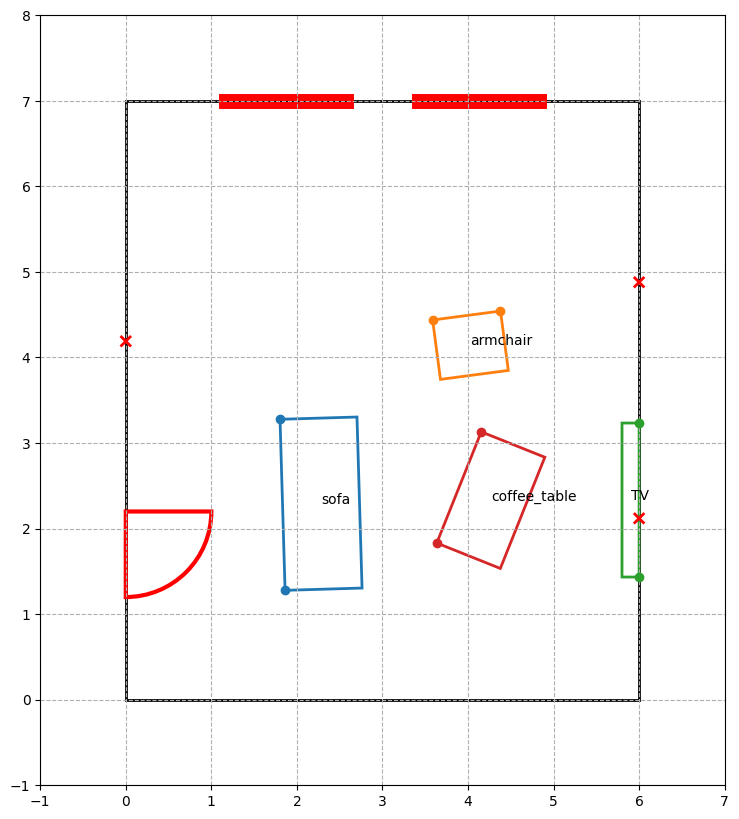

In [5]:
living_room = create_room(6, 7)
create_fixed_object(living_room, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(living_room, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(living_room, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(living_room, 'sofa', 2, 0.9, 'living', 0)
create_moving_object(living_room, 'armchair', 0.8, 0.7, 'living', 1)
create_moving_object(living_room, 'TV', 1.8, 0.2, 'living', 2)
create_moving_object(living_room, 'coffee_table', 1.4, 0.8, 'living', 3)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 2, 'back')  # TV
    output += ind_central(positions, room, 2)
    output += ind_close_to_fixed_object(positions, room, 2, 'socket', side = 'back')

    output += p_facing(positions, room, 0, 2, both = True)
    output += p_facing(positions, room, 1, 3)
    output += p_facing(positions, room, 0, 3)
    output += p_infront(positions, room, 3, 2)
    output += p_infront(positions, room, 3, 0)
    output += p_perpendicular_aligned(positions, room, 0, 1, center_object_index=3)

    output += ind_accessible(positions, room, 3, ['front', 'left', 'right', 'back'])

    output += 3*ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(living_room.moving_objects), [living_room.width, living_room.length, 2*np.pi] * len(living_room.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 100
min_fun = np.Inf
iters = 0
while min_fun > 0.3:
    positions = np.zeros(3*len(living_room.moving_objects))
    for i in range(len(living_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, living_room.width)
        positions[3*i + 1] = np.random.uniform(0, living_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (living_room), method = 'SLSQP', options = options)

    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    if iters%10 == 0: 
        print(iters, best_res.fun)
    iters += 1


print(iters, best_res.fun)
for i in range(len(living_room.moving_objects)): 
    living_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

living_room.draw() 

In [41]:
def p_surround(positions, room, central_object_index, object_indices):
    """ The function p_surroudn ensures that central_object is surrounded by all the objects in object_indices.
        This would be used for chairs around a dining table.

        Args:
        positions: list of floats, x, y, theta values for all objects in the room
        room: rectangular Room object
        central_object_index: int, Object object
        object_indices: list of ints, indices of Object objects
    """

    val = 0
    center_x, center_y = positions[3*central_object_index:3*central_object_index + 2]

    pos = np.array(positions).reshape(-1, 3)
    pos = pos[object_indices, :]
    thetas = pos[:, 2] ## all thetas should add up to a multiple of pi
    val += (np.sum(thetas) - np.round(np.sum(thetas)/np.pi)*np.pi)**2

    center_of_mass = np.mean(pos[:, :2], axis = 0)
    val += 2 * ((center_of_mass[0] - center_x)**2 + (center_of_mass[1] - center_y)**2)# center of mass of all the objects
    all_objects_distances_to_sides = []
    for i in range(len(object_indices)):
        #val += p_facing(positions, room, object_indices[i], central_object_index)
        val += p_next_to(positions, room, object_indices[i], central_object_index, side1 = 'front')
        distances_to_sides = [p_next_to(positions, room, object_indices[i], central_object_index, side1 = 'front', side2 = j) for j in ['front', 'back', 'left', 'right']]
        all_objects_distances_to_sides += [min(distances_to_sides)]
    


    all_objects_distances_to_sides = np.array(all_objects_distances_to_sides)
    average_distance = np.mean(all_objects_distances_to_sides)
    for j in range(len(object_indices)):
        val += np.sum((all_objects_distances_to_sides[j] - average_distance)**2)

    return val


No region with this name is in the room.
Region not found.
0 0.0008874204810539403
1 0.0008874204810539403 Optimization terminated successfully


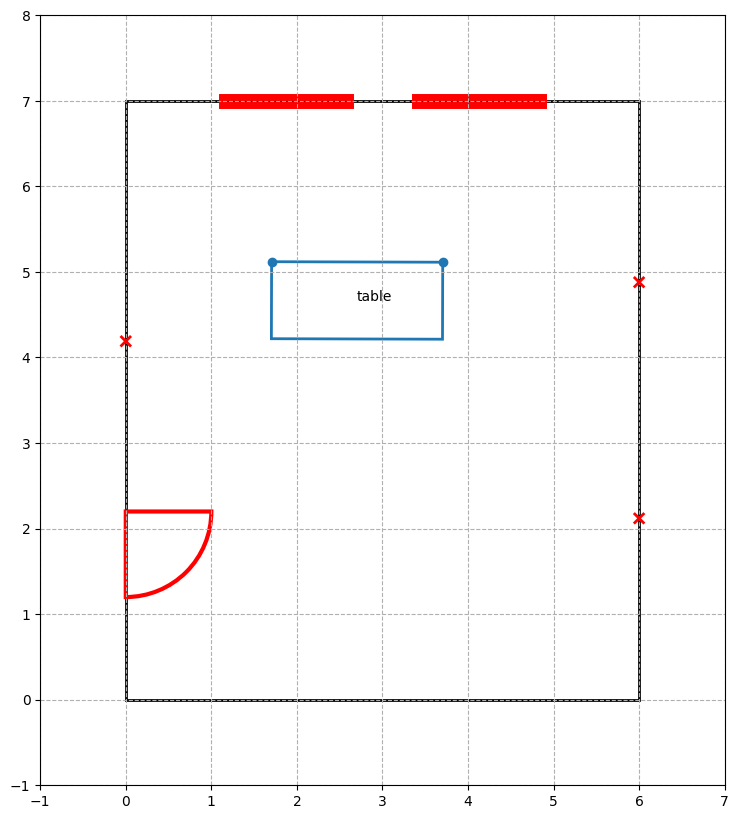

0.0008874204810539403


In [63]:
## Dining Room 

dining_room = create_room(6, 7)
create_fixed_object(dining_room, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(dining_room, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(dining_room, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(dining_room, 'table', 2, 0.9, 'dining', 0)
# for i in range(6):
#     create_moving_object(dining_room, 'chair', 0.6, 0.5, 'dining', i + 1)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_central(positions, room, 0, both = True) # dining table 
    #output += p_surround(positions, room, 0, [i + 1 for i in range(6)]) # chairs around dining table
    # for i in range(1,  7): 
    #     output += p_next_to(positions, room, i, 0, side1 = 'front')

    output += ind_aligned(positions, room)
    output += 5*ind_in_bounds(positions, room)
    output += 5*ind_no_overlap(positions, room)

    return output

bounds = Bounds([0] * 3 * len(dining_room.moving_objects), [dining_room.width, dining_room.length, 2*np.pi] * len(dining_room.moving_objects))
options = {'maxiter': 400, 'ftol': 1e-6}


max_iters = 30
min_fun = np.Inf
iters = 0
while min_fun > 1e-2:
    positions = np.zeros(3*len(dining_room.moving_objects))
    for i in range(len(dining_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, dining_room.width)
        positions[3*i + 1] = np.random.uniform(0, dining_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (dining_room), method = 'SLSQP', options = options)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 

    if iters % 10 == 0: 
        print(iters, best_res.fun)

    iters += 1

print(iters, res.fun, res.message)
    
for i in range(len(dining_room.moving_objects)): 
    dining_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

dining_room.draw() 
print(best_res.fun)

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 3.4317169046715343
10 0.4291742580442152
Max number of iterations reached.
15 2.694138237634026 Optimization terminated successfully


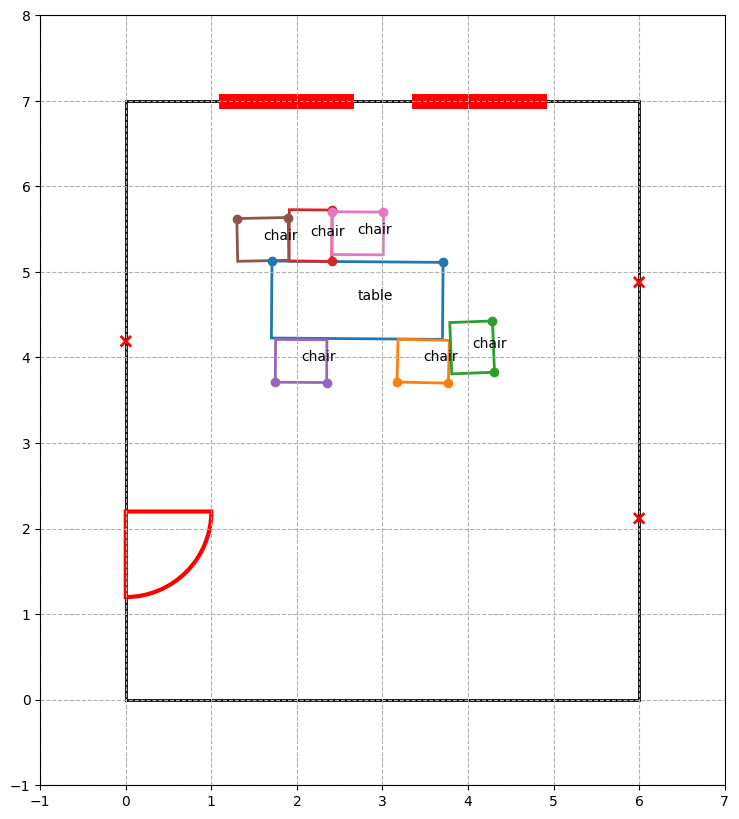

0.4291742580442152


In [64]:
for i in range(6):
    create_moving_object(dining_room, 'chair', 0.6, 0.5, 'dining', i + 1)

def optimize_primary_objects(positions, room): 

    output = 0
    # for i in range(1,  7): 
    #     output += p_next_to(positions, room, i, 0, side1 = 'front')

    output += p_surround(positions, room, 0, [i + 1 for i in range(6)]) # chairs around dining table

    output += 100*np.linalg.norm(positions[:3] - dining_room.moving_objects[0].position)**2
    output += 3*ind_aligned(positions, room)
    output += 5*ind_in_bounds(positions, room)
    output += 5*ind_no_overlap(positions, room)

    return output

bounds = Bounds([0] * 3 * len(dining_room.moving_objects), [dining_room.width, dining_room.length, 2*np.pi] * len(dining_room.moving_objects))
options = {'maxiter': 400, 'ftol': 1e-6}


max_iters = 15
min_fun = np.Inf
iters = 0
while min_fun > 1e-2:
    positions = np.zeros(3*len(dining_room.moving_objects)) 
    positions[:3] = dining_room.fixed_objects[-1].position
    for i in range(1, len(dining_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, dining_room.width)
        positions[3*i + 1] = np.random.uniform(0, dining_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (dining_room), method = 'SLSQP', options = options)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 

    if iters % 10 == 0: 
        print(iters, best_res.fun)

    iters += 1

print(iters, res.fun, res.message)
    
for i in range(len(dining_room.moving_objects)): 
    dining_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

dining_room.draw() 
print(best_res.fun)

0 2.3263090020626236 Optimization terminated successfully 2.3263090020626236
1 3.519639778462272 Optimization terminated successfully 3.519639778462272
2 21.08902939795792 Optimization terminated successfully 21.08902939795792
3 2.1263168835447583 Optimization terminated successfully 2.1263168835447583
4 4.113008558617754 Optimization terminated successfully 4.113008558617754
5 1.7161224367400878 Optimization terminated successfully 1.7161224367400878
6 11.180764743769595 Optimization terminated successfully 11.180764743769595
7 6.312846526271279 Optimization terminated successfully 6.312846526271279
8 2.368018924376682 Optimization terminated successfully 2.368018924376682
9 13.471548018865398 Optimization terminated successfully 13.471548018865398
10 31.064202078428554 Optimization terminated successfully 31.064202078428554
11 40.64816066342334 Optimization terminated successfully 40.64816066342334
12 19.807162295430476 Optimization terminated successfully 19.807162295430476
13 25.35

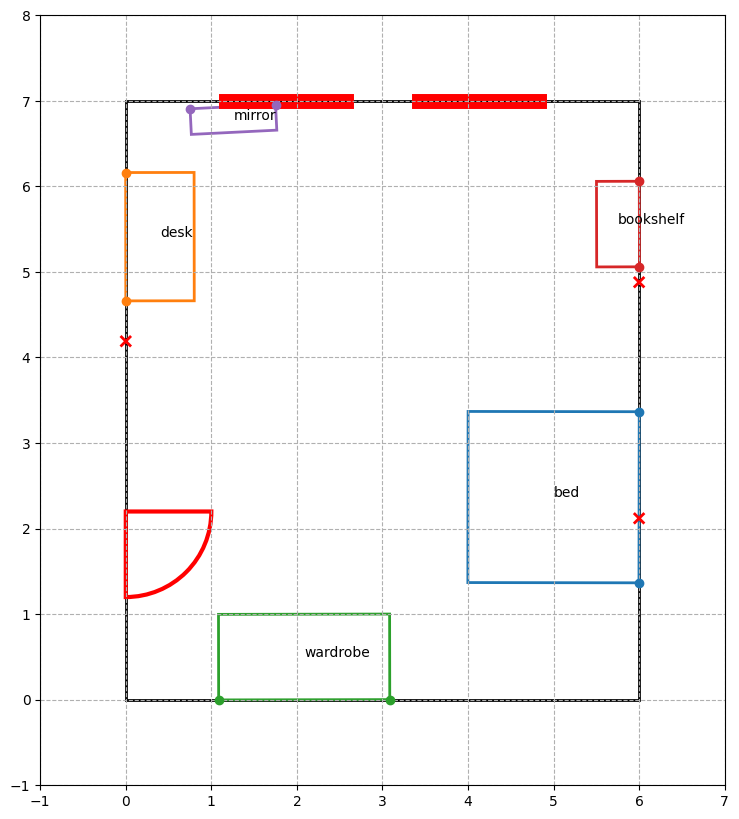

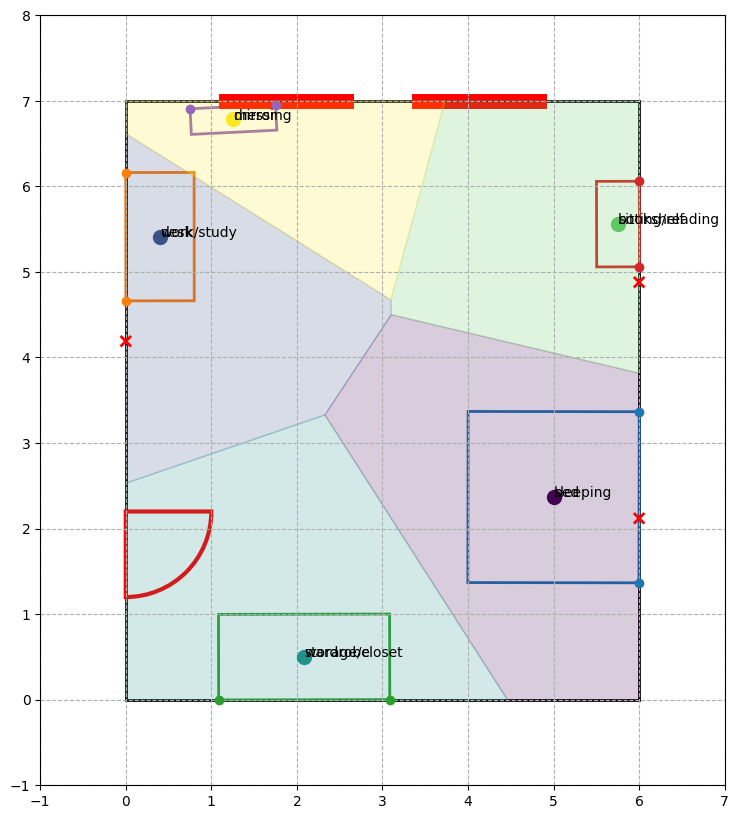

0 34.448733069217425 Optimization terminated successfully 8.456532357933643
1 666263.7331621356 Optimization terminated successfully 1807.6129714328938
2 21.083955473614736 Optimization terminated successfully 5.422496971973078
3 43301.81525895008 Iteration limit reached 34.383244198733216
4 37.96914485926208 Optimization terminated successfully 12.601392638238053
5 26.46847323927938 Optimization terminated successfully 9.09879707913446
6 25.139569544574996 Optimization terminated successfully 8.893963875811709
7 50.04382252189268 Optimization terminated successfully 12.990227802162838
8 40.76548066777122 Optimization terminated successfully 7.257424096524984
9 11.489057744836538 Optimization terminated successfully 4.904236817545759
10 29.80122988957546 Optimization terminated successfully 9.401359226326804
11 7.247891576818077 Optimization terminated successfully 7.77004920281883
12 21.806981793601558 Optimization terminated successfully 6.2995612393621965
13 23.310164677979692 Optim

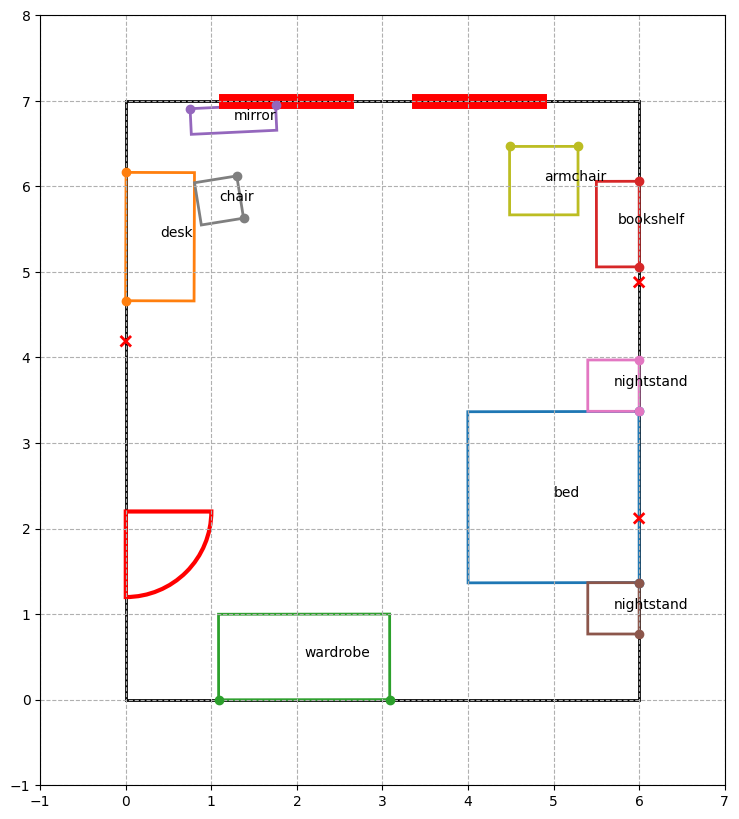

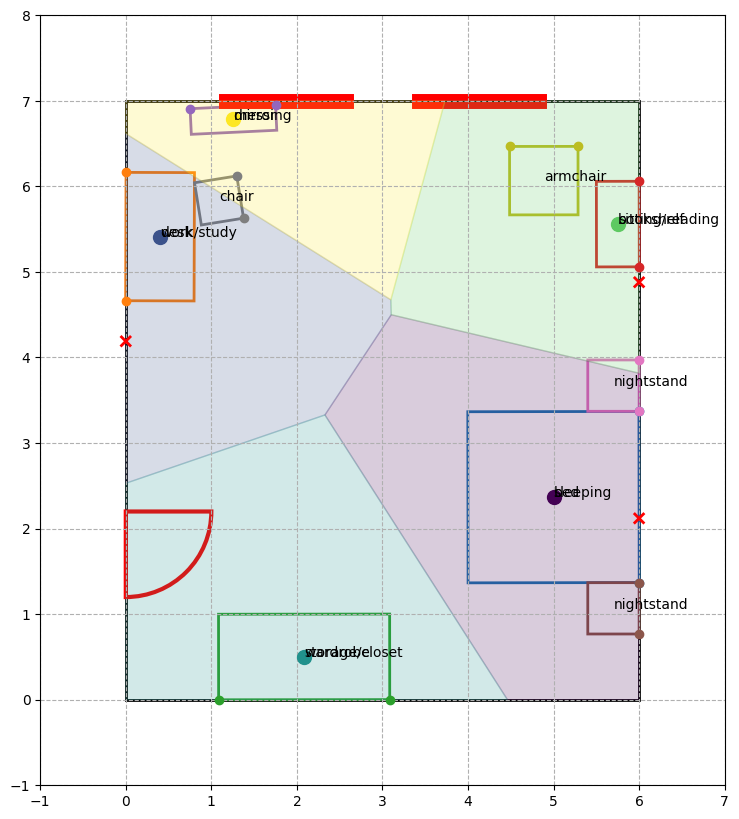

In [14]:
#from Pairwise import * 

large_bedroom = create_room(6, 7)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)

sleeping_region = region_setup(large_bedroom, 'sleeping', 0)
work_study_region = region_setup(large_bedroom, 'work/study', 1)
storage_closet_region = region_setup(large_bedroom, 'storage/closet', 2)
sitting_reading_region = region_setup(large_bedroom, 'sitting/reading', 3)
dressing_region = region_setup(large_bedroom, 'dressing', 4)

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'desk', 1.5, 0.8, 'work/study', 1)
create_moving_object(large_bedroom, 'wardrobe', 2, 1, 'storage/closet', 2)
create_moving_object(large_bedroom, 'bookshelf', 1, 0.5, 'sitting/reading', 3)
create_moving_object(large_bedroom, 'mirror', 1, 0.3, 'dressing', 4)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += ind_central(positions, room, 0)
    output += ind_accessible(positions, room, 0, ['front', 'left', 'right'])  # bed

    output += ind_next_to_wall(positions, room, 1, 'back')  # desk
    output += ind_close_to_fixed_object(positions, room, 1, 'socket', side = 'back', max_dist = 2)
    output += ind_close_to_fixed_object(positions, room, 1, 'window', max_dist = 2)
    output += p_away_from(positions, room, 1, 0)
    output += ind_accessible(positions, room, 1, ['front'])

    output += ind_next_to_wall(positions, room, 2, 'back')  # wardrobe
    output += ind_not_block_fixed_object(positions, room, 2, 'window')
    output += ind_accessible(positions, room, 2, ['front'])

    output += ind_next_to_wall(positions, room, 3, 'back')  # bookshelf
    output += ind_not_block_fixed_object(positions, room, 3, 'window')
    output += ind_accessible(positions, room, 3, ['front'])

    output += ind_next_to_wall(positions, room, 4, 'back')  # mirror
    output += ind_accessible(positions, room, 4, ['front'])
    output += ind_not_block_fixed_object(positions, room, 4, 'window')

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    output += reg_distinct_regions((positions.reshape(-1, 3)[:, :2]).flatten(), room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 25
min_fun = np.Inf
iters = 0
while min_fun > 1:
    positions = np.zeros(3*len(large_bedroom.moving_objects))
    for i in range(len(large_bedroom.moving_objects)): 
        positions[3*i] = np.random.uniform(0, large_bedroom.width)
        positions[3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(iters, res.fun, res.message, optimize_primary_objects(res.x, large_bedroom))
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    iters += 1
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 
    large_bedroom.regions[i].x, large_bedroom.regions[i].y = best_res.x[3*i:3*i + 2]

large_bedroom.draw() 
large_bedroom.draw(draw_regions = True)


create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'sleeping', 5)
create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'sleeping', 6)
create_moving_object(large_bedroom, 'chair', 0.5, 0.5, 'work/study', 7)
create_moving_object(large_bedroom, 'armchair', 0.8, 0.8, 'sitting/reading', 8)

def optimize_primary_objects2(positions, room): 
    
    output = 0
    output += 2*FIX(positions, room, [i for i in range(5)])

    ## nightstands
    output += ind_next_to_wall(positions, room, 5, 'back')
    output += ind_next_to_wall(positions, room, 6, 'back')
    output += ind_accessible(positions, room, 5, ['front'])
    output += ind_accessible(positions, room, 6, ['front'])
    output += ind_in_region(positions, room, 5, 'sleeping')
    output += ind_in_region(positions, room, 6, 'sleeping')
    output += p_next_to(positions, room, 5, 0, side1 = 'right', side2 = 'left')
    output += p_next_to(positions, room, 6, 0, side1 = 'left', side2 = 'right')
    output += p_aligned(positions, room, 5, 6, ['bed', 0])

    ## desk chair
    output += ind_accessible(positions, room, 7, ['back']) 
    output += ind_in_region(positions, room, 7, 'work/study')
    output += p_next_to(positions, room, 7, 1, side1 = 'front', side2 = 'front')
    output += p_facing(positions, room, 7, 1, both = True)

    ## armchair 
    output += ind_accessible(positions, room, 8, ['front'])
    output += ind_in_region(positions, room, 8, 'sitting/reading')
    output += p_perpendicular_aligned(positions, room, 8, 3)

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 25
min_fun = np.Inf
iters = 0
while min_fun > 1:
    positions = np.zeros(3*len(large_bedroom.moving_objects))
    for i in range(len(large_bedroom.regions)): 
        positions[3*i] = large_bedroom.moving_objects[i].position[0]
        positions[3*i + 1] = large_bedroom.moving_objects[i].position[1]
        positions[3*i + 2] = large_bedroom.moving_objects[i].position[2]
    for i in range(len(large_bedroom.regions), len(large_bedroom.moving_objects)): 
        positions[3*i] = np.random.uniform(0, large_bedroom.width)
        positions[3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects2, positions, args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(iters, res.fun, res.message, optimize_primary_objects(res.x, large_bedroom))
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    iters += 1
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

large_bedroom.draw() 
large_bedroom.draw(draw_regions = True)
